<a href="https://colab.research.google.com/github/DANIEL20625/homework/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # for cool graphics
import seaborn as sb # even cooler graphics

In [48]:
BusinessAnalyst = pd.read_csv("drive/MyDrive/BusinessAnalyst.csv")
DataAnalyst = pd.read_csv("drive/MyDrive/DataAnalyst.csv")
DataEngineer = pd.read_csv("drive/MyDrive/DataEngineer.csv")
DataScientist = pd.read_csv("drive/MyDrive/DataScientist.csv")

## ***步驟2.資料合併***
# 初步讀入資料後可以發現各個資料的欄位數量並不一樣

In [49]:
print(BusinessAnalyst.shape)

(4092, 17)


In [50]:
DataAnalyst.shape

(2253, 16)

In [51]:
DataEngineer.shape

(2528, 15)

In [52]:
DataScientist.shape

(3909, 17)

# 欲確認四個資料之間缺少那些欄位，我以BusinessAnalyst 中17個欄位為標準，判斷其他資料與之相差欄位

In [53]:
BusinessAnalyst_col = list(BusinessAnalyst.columns)
DataAnalyst_col = list(DataAnalyst.columns)
DataEngineer_col = list(DataEngineer.columns)
DataScientist_col = list(DataScientist.columns)
col = ['Data','Common_col','Missing_col']
col_missing = pd.DataFrame(columns=col)
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'BusinessAnalyst','Common_col':','.join([x for x in BusinessAnalyst_col if x in BusinessAnalyst_col]), 'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in BusinessAnalyst_col])}])])
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'DataAnalyst','Common_col':','.join([x for x in BusinessAnalyst_col if x in DataAnalyst_col]), 'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in DataAnalyst_col])}])])
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'DataEngineer','Common_col':','.join([x for x in BusinessAnalyst_col if x in DataEngineer_col]), 'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in DataEngineer_col])}])])
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'DataScientist','Common_col':','.join([x for x in BusinessAnalyst_col if x in DataScientist_col]) ,'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in DataScientist_col])}])])
col_missing

,Data,Common_col,Missing_col
0,BusinessAnalyst,"Unnamed: 0,index,Job Title,Salary Estimate,Job...",
0,DataAnalyst,"Unnamed: 0,Job Title,Salary Estimate,Job Descr...",index
0,DataEngineer,"Job Title,Salary Estimate,Job Description,Rati...","Unnamed: 0,index"
0,DataScientist,"Unnamed: 0,index,Job Title,Salary Estimate,Job...",


**可以發現相差的欄位命名為 [index,Unnamed: 0] 初步判斷與資料內容無太大相關，之後細看合併時可以考慮drop掉** 

In [54]:
BusinessAnalyst.describe().transpose()

,count,unique,top,freq
Unnamed: 0,4092,3962,Business Analyst,16
index,4092,3706,$35K-$65K (Glassdoor est.),30
Job Title,4092,2210,Business Analyst,502
Salary Estimate,4092,167,$43K-$78K (Glassdoor est.),60
Job Description,4092,3732,Citi\n3.7,22
Rating,4092,41,"Jacksonville, FL",392
Company Name,4092,2197,"Staffigo Technical Services, LLC\n5.0",156
Location,4092,218,"San Diego, CA",348
Headquarters,4092,625,-1,316
Size,4092,17,10000+ employees,717


In [55]:
BusinessAnalyst.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [56]:
BusinessAnalyst.tail(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,NaN,NaN
4091,Financial Analyst II - Baptist,$66K-$114K (Glassdoor est.),Job Summary\n\nThis unique analyst position re...,2.7,Baptist Medical Center Jacksonville\n2.7,"Jacksonville, FL","Jacksonville, FL",5001 to 10000 employees,-1,Hospital,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1,NaN,NaN


BusinessAnalyst 這個資料集 應該只有數值的欄位 [Unnamed: 0,index] 卻出現文字，資料不是很乾淨,後面的資料有位移往前兩個欄位


In [57]:
len(DataAnalyst['Unnamed: 0'].unique())== DataAnalyst.shape[0]

True

In [58]:
len(DataScientist['index'].unique()) == len(DataScientist['Unnamed: 0'].unique()) | len(DataScientist['index'].unique()) == DataScientist.shape[0]

True

In [59]:
DataScientist = DataScientist.drop(["Unnamed: 0","index"], axis = 1)

In [60]:
DataAnalyst = DataAnalyst.drop("Unnamed: 0", axis = 1)

因為 DataEngineer 這個資料集 沒有  [Unnamed: 0,index] 應該是不會有跑位情況之後合併再判斷， 剩下兩個資料集 index 與 Unnamed: 0 數量都吻合資料筆數所以沒有跑位問題

In [61]:
nan_case = BusinessAnalyst[pd.isna(BusinessAnalyst['Easy Apply'])]
normal_case = BusinessAnalyst[pd.isna(BusinessAnalyst['Easy Apply'])==False]

In [62]:
normal_case.describe().transpose()

,count,unique,top,freq
Unnamed: 0,3692,3692,0,1
index,3692,3692,0,1
Job Title,3692,1865,Business Analyst,502
Salary Estimate,3692,138,$43K-$78K (Glassdoor est.),60
Job Description,3692,3560,"We are:\n\nAccenture Technology, the people wh...",8
Rating,3692,35,-1.0,318
Company Name,3692,2102,"Staffigo Technical Services, LLC\n5.0",156
Location,3692,209,"San Diego, CA",348
Headquarters,3692,563,"New York, NY",210
Size,3692,9,10000+ employees,717


In [63]:
nan_case_clear = nan_case.drop(["Competitors","Easy Apply"], axis = 1)
normal_case = normal_case.drop(["Unnamed: 0","index"], axis = 1)
nan_case_clear.columns = normal_case.columns
nan_case_clear

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJac...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia,...",-1
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex ...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3695,Software Quality Assurance Analyst,$50K-$78K (Glassdoor est.),SUMMARY\n\nThe Software Quality Assurance (SQA...,3.9,AdTheorent\n3.9,"Jacksonville, FL","New York, NY",201 to 500 employees,2011,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),-1,-1
3696,Senior Support Analyst,$50K-$78K (Glassdoor est.),Vacancy Name Senior Support Analyst\nVacancy R...,3.2,SmartStream Technologies\n3.2,"Jacksonville, FL","London, United Kingdom",501 to 1000 employees,2000,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1


# **步驟2 資料合併結束**

In [64]:
DataEngineer['data_job'] = "DataEngineer"
DataAnalyst['data_job'] = "DataAnalyst"
DataScientist['data_job'] = "DataScientist"
nan_case_clear['data_job'] = "BusinessAnalyst"
normal_case['data_job'] = "BusinessAnalyst"
ALL_Data = pd.concat([DataEngineer,DataAnalyst,DataScientist,nan_case_clear,normal_case])
ALL_Data.drop_duplicates(subset=ALL_Data.columns, keep='first', inplace=True)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,data_job
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,DataEngineer
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,DataEngineer
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,DataEngineer
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,DataEngineer
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,DataEngineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,Pega Business Analyst,$58K-$103K (Glassdoor est.),• 5 yrs relevant experience in:- Experience wi...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,2005,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1,BusinessAnalyst
12766,Jr.Business Analyst,$58K-$103K (Glassdoor est.),Job Description\n\nNew businesses are making t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,BusinessAnalyst
12767,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),Title: Business Process Analyst\nDuration: 4+ ...,-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1,BusinessAnalyst
12768,"AVP, Business System",$58K-$103K (Glassdoor est.),We are looking for a AVP Business System Analy...,3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1,BusinessAnalyst


# **步驟3_1 EDA 4_1資料探勘 四項工作內容與薪水**

將預估的薪水欄位切分成 MinSalary 與 MaxSalary 即產生平均的薪水

In [5]:
ALL_Data[['MinSalary','MaxSalary']] = ALL_Data['Salary Estimate'].str.split(r"[\D]+",expand=True).drop([0,3],axis=1)
ALL_Data['MinSalary'] = ALL_Data['MinSalary'].apply(lambda x: int(x) * 1000)
ALL_Data = ALL_Data.drop(ALL_Data[pd.isna(ALL_Data['MaxSalary'])].index[0], axis=0)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data['MaxSalary'] = ALL_Data['MaxSalary'].apply(lambda x: int(x) * 1000)
ALL_Data['AverageSalary'] = ALL_Data[['MaxSalary','MinSalary']].mean(axis=1)
ALL_Data.drop(['Salary Estimate'],axis=1,inplace=True)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data.head(5)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,data_job,MinSalary,MaxSalary,AverageSalary
0,0,Data Engineer,Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,DataEngineer,80000,150000,115000.0
1,1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,DataEngineer,80000,150000,115000.0
2,2,Data Engineers,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,DataEngineer,80000,150000,115000.0
3,3,Client Trade Support Engineer,About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,DataEngineer,80000,150000,115000.0
4,4,Data Engineer,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,DataEngineer,80000,150000,115000.0


資料欄位中有一些 -1 的值 去除掉

In [6]:
ALL_Data['Rating'] = ALL_Data['Rating'].astype(float)
ALL_Data['Rating'].unique()

array([ 4.5,  3.4,  5. ,  4.8,  3.7,  3. ,  4.2,  4.3,  4.4,  4. ,  3.9,
        3.5,  3.8,  3.3,  4.1,  4.9,  4.7,  3.6,  2.5,  3.1,  2.9, -1. ,
        2.7,  1. ,  3.2,  2.6,  2.8,  4.6,  2.2,  2. ,  2.4,  1.6,  2.1,
        2.3,  1.5,  1.7,  1.9,  1.8])

In [7]:
ALL_Data = ALL_Data.drop(ALL_Data[ALL_Data['Rating'] == -1].index,axis=0)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data['Rating'].unique()

array([4.5, 3.4, 5. , 4.8, 3.7, 3. , 4.2, 4.3, 4.4, 4. , 3.9, 3.5, 3.8,
       3.3, 4.1, 4.9, 4.7, 3.6, 2.5, 3.1, 2.9, 2.7, 1. , 3.2, 2.6, 2.8,
       4.6, 2.2, 2. , 2.4, 1.6, 2.1, 2.3, 1.5, 1.7, 1.9, 1.8])

In [8]:
ALL_Data[['StateName','State']] = ALL_Data['Location'].str.split(', ',expand=True).drop([2],axis=1)
ALL_Data.drop(['Location'],axis=1,inplace=True)

In [9]:
ALL_Data['State'].unique()

array(['NY', 'NJ', 'CA', 'IL', 'TX', 'AZ', 'PA', 'DE', 'FL', 'UT', 'VA',
       'OH', 'NC', 'SC', 'IN', 'WA', 'GA', 'KS', 'CO', 'Arapahoe',
       'United Kingdom', 'Los Angeles'], dtype=object)

In [10]:
ALL_Data['State'] = ALL_Data['State'].str.replace('Los Angeles','CA')
ALL_Data['State'] = ALL_Data['State'].str.replace('Arapahoe','CO')
ALL_Data['State'] = ALL_Data['State'].str.replace('United Kingdom','UK')

在各個地區或是國家中 四項job的薪水分布，當中 DataScientist 的薪水相對其他較高，同時整個薪水的range也相對較廣


Text(0.5, 1.0, 'Distribution of AverageSalary by data_job')

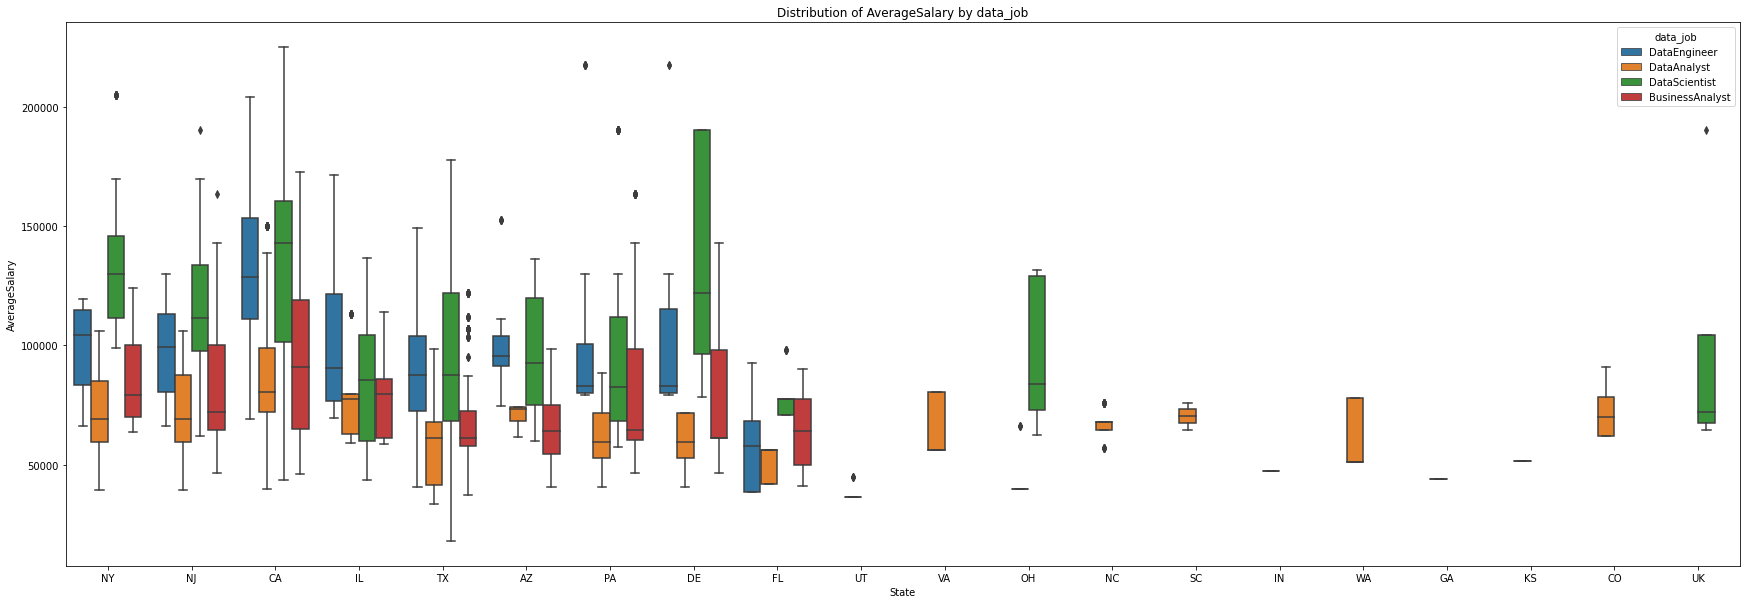

In [88]:
plt.rcParams["figure.figsize"] = (30,10)
sb.boxplot(x='State',y='AverageSalary',hue = "data_job",data=ALL_Data).set_title("Distribution of AverageSalary by data_job")

各地區從事 DataAnalyst 相對較多

Text(0.5, 1.0, 'Number of data_job offers by State')

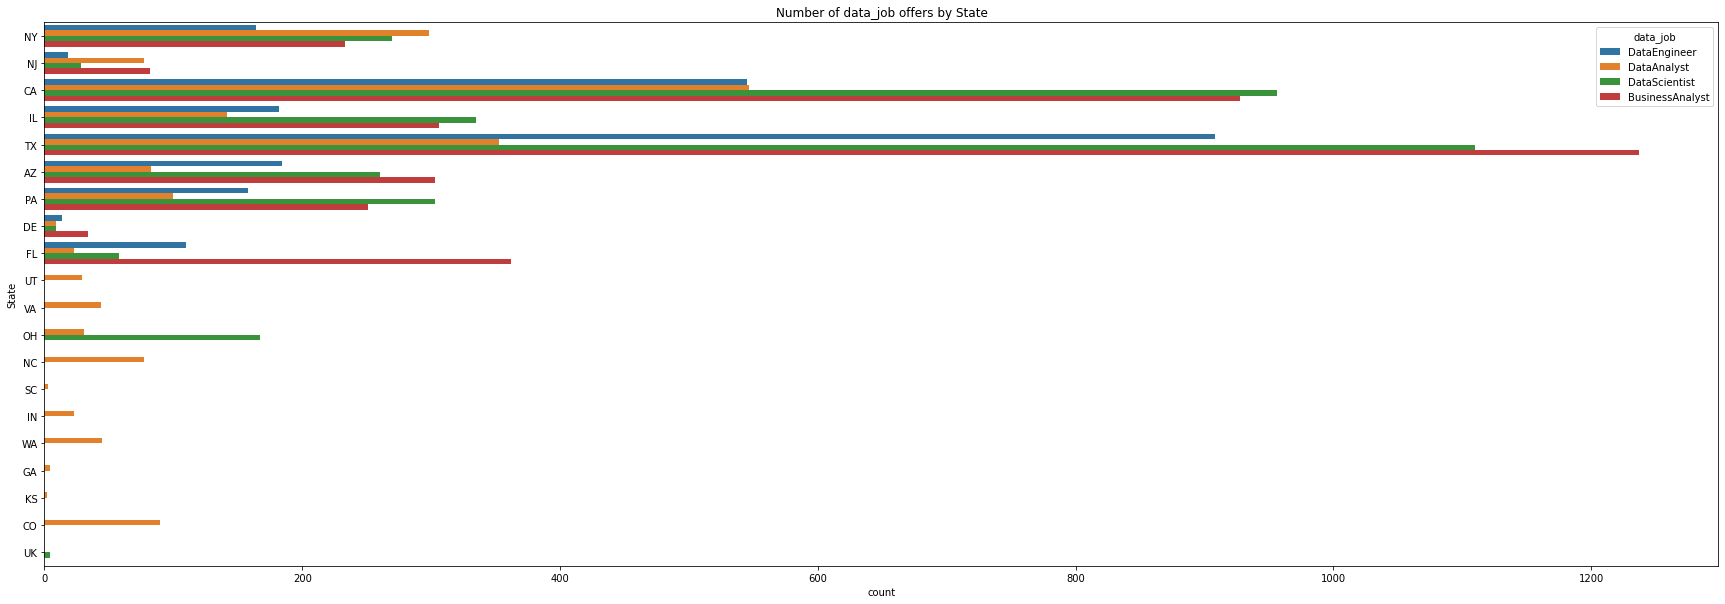

In [73]:
plt.rcParams["figure.figsize"] = (30,10)
sb.countplot(y='State',hue = "data_job", data=ALL_Data).set_title("Number of data_job offers by State")

In [ ]:
ALL_Data.drop(['Headquarters'],axis=1,inplace=True)
ALL_Data.head(5)

Text(0.5, 1.0, 'Number of job offers by Sector')

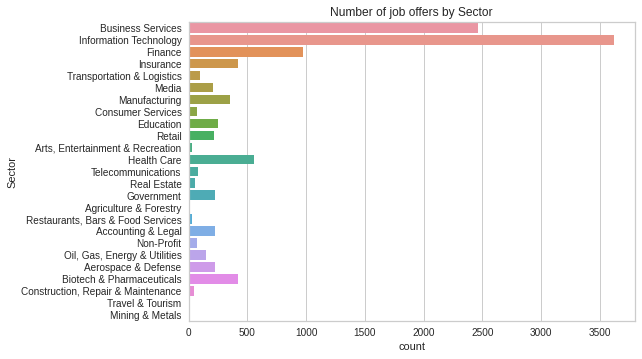

In [13]:
ALL_Data = ALL_Data.drop(ALL_Data[ALL_Data['Sector'] == "-1"].index,axis=0)
ALL_Data.reset_index(drop=True, inplace=True)
sb.countplot(y='Sector',data=ALL_Data).set_title("Number of job offers by Sector")

DataScientist 在各項產業中都有較高的平均薪水，而DataAnalyst 與 BusinessAnalyst 薪水相對低

Text(0.5, 1.0, 'Distribution of AverageSalary by Sector')

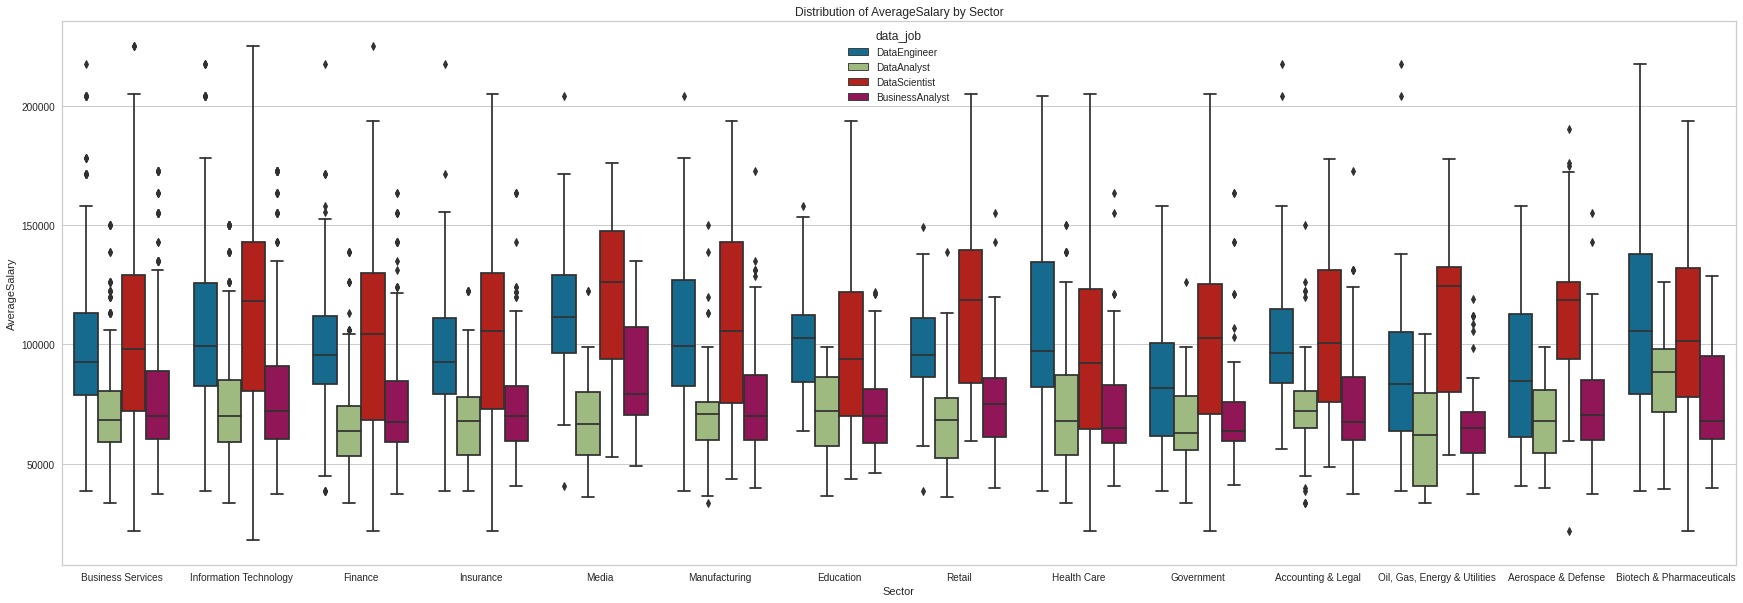

In [14]:
plt.rcParams["figure.figsize"] = (30,10)
plus100 = ALL_Data['Sector'].map(ALL_Data['Sector'].value_counts()) > 100 # More than 100 job offers
sb.boxplot(x='Sector',y='AverageSalary',hue="data_job",data=ALL_Data[plus100]).set_title("Distribution of AverageSalary by Sector")

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

stopWords = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

def get_wordcloud(series): #simple function to tokenize and plot a said column
    word_cloud = ''
    
    for job in series:
        tokens = tokenizer.tokenize(job)
        for token in tokens:
            if token not in stopWords:
                word_cloud += ''.join(token) + ' '

    wordcloud = WordCloud(height=500,margin=0,max_words=200,
                          colormap='Set1',relative_scaling =0.7).generate(word_cloud) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

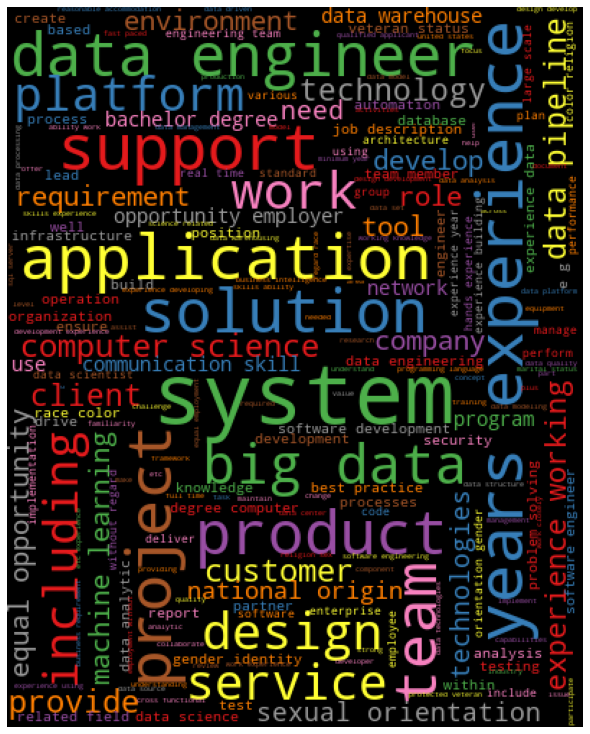

In [118]:
job_titles = ALL_Data['Job Description'][ALL_Data['data_job'] == "DataEngineer"].apply(lambda x: x.lower())
get_wordcloud(job_titles)
#application data pipeline including years_experience big_data service product team dssign support platform

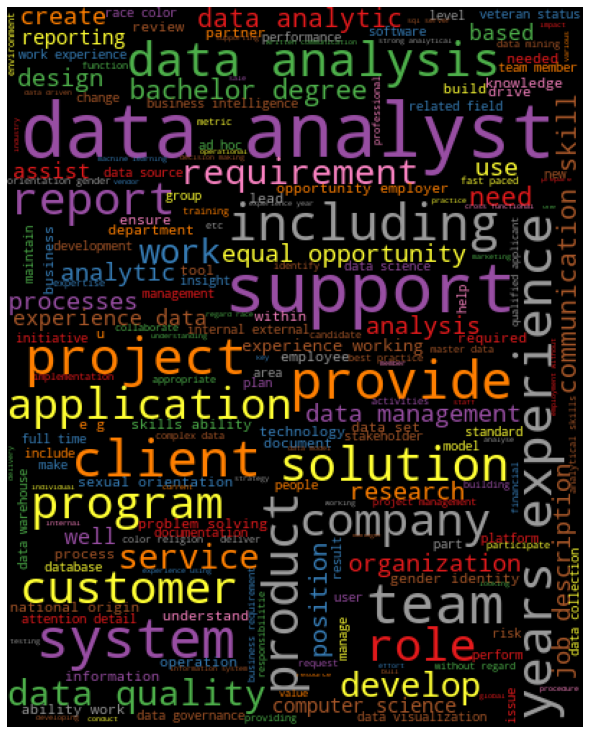

In [119]:
job_titles = ALL_Data['Job Description'][ALL_Data['data_job'] == "DataAnalyst"].apply(lambda x: x.lower())
get_wordcloud(job_titles)
#program data quality customer report

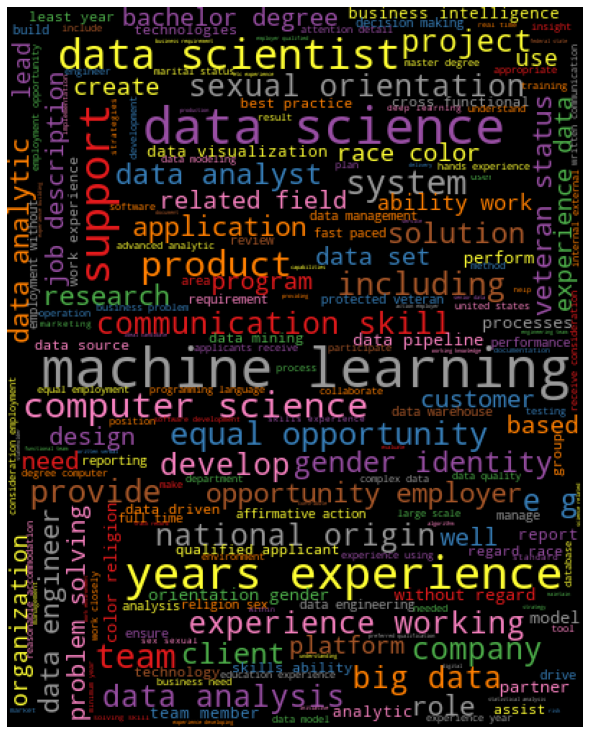

In [120]:
job_titles = ALL_Data['Job Description'][ALL_Data['data_job'] == "DataScientist"].apply(lambda x: x.lower())
get_wordcloud(job_titles)
#machine_learning data_analyst computer_sience(DE) business_intelligence 

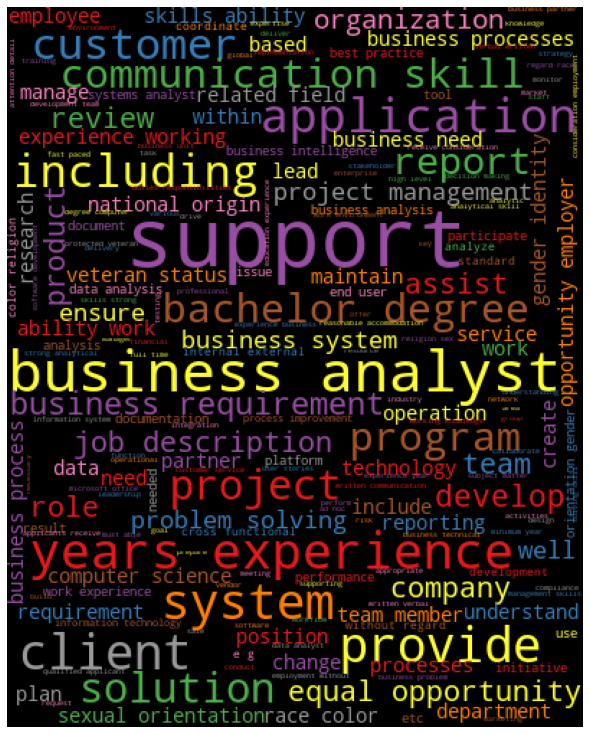

In [121]:
job_titles = ALL_Data['Job Description'][ALL_Data['data_job'] == "BusinessAnalyst"].apply(lambda x: x.lower())
get_wordcloud(job_titles)
#communication skill

**DataScientist 的工作內容描述 包含其他三種，四種共同的是需要 years_experience**

# **步驟4_2 預測薪資**

In [ ]:
pip install pycaret[full]

In [ ]:
pip install markupsafe==2.0.1

In [1]:
import jinja2
import pycaret
from sklearn.model_selection import train_test_split

In [17]:
train_data_set, test_data_set = train_test_split(ALL_Data, random_state=777, train_size=0.8)

In [18]:
train_data_set = train_data_set[['Rating','Size','Type of ownership', 'Industry', 'Sector', 'data_job', 'StateName', 'State','AverageSalary']]
test_data_set = test_data_set[['Rating','Size','Type of ownership', 'Industry', 'Sector', 'data_job', 'StateName', 'State','AverageSalary']]

In [25]:
from pycaret.regression import *

In [ ]:
reg1 = setup(data=train_data_set,test_data=test_data_set, target = 'AverageSalary')

In [31]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.989146e+04,6.728532e+08,2.593518e+04,4.493000e-01,0.2848,2.425000e-01,0.326
catboost,CatBoost Regressor,1.982718e+04,6.733704e+08,2.594485e+04,4.489000e-01,0.2865,2.423000e-01,4.020
gbr,Gradient Boosting Regressor,2.003339e+04,6.812043e+08,2.609593e+04,4.428000e-01,0.2886,2.471000e-01,4.080
xgboost,Extreme Gradient Boosting,2.006375e+04,6.924366e+08,2.630910e+04,4.335000e-01,0.2900,2.442000e-01,13.078
br,Bayesian Ridge,2.068415e+04,7.233247e+08,2.689220e+04,4.081000e-01,0.2973,2.545000e-01,1.876
omp,Orthogonal Matching Pursuit,2.079758e+04,7.357821e+08,2.712061e+04,3.981000e-01,0.3007,2.554000e-01,0.252
ridge,Ridge Regression,2.084006e+04,7.370876e+08,2.714657e+04,3.968000e-01,0.3015,2.561000e-01,0.102
huber,Huber Regressor,2.054144e+04,7.410508e+08,2.721836e+04,3.937000e-01,0.2982,2.473000e-01,4.014
llar,Lasso Least Angle Regression,2.084031e+04,7.411801e+08,2.722033e+04,3.936000e-01,0.3022,2.560000e-01,0.726
par,Passive Aggressive Regressor,2.029570e+04,7.447322e+08,2.728664e+04,3.908000e-01,0.2989,2.427000e-01,5.370


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=297, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [32]:
Light_Gradient_Boosting_Machine = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20121.0708,7.109389e+08,26663.4368,0.3596,0.2908,0.2450
1,18723.0786,5.952166e+08,24397.0621,0.4813,0.2716,0.2274
2,19762.0847,6.462937e+08,25422.3075,0.4615,0.2863,0.2468
3,19964.0935,6.796000e+08,26069.1388,0.4569,0.2946,0.2542
4,21007.6946,7.566846e+08,27507.9001,0.4200,0.2957,0.2510
5,19560.4469,6.751220e+08,25983.1099,0.4614,0.2792,0.2340
6,19564.1434,6.378624e+08,25255.9382,0.4974,0.2763,0.2380
7,20166.3374,7.042056e+08,26536.8723,0.4369,0.2901,0.2479
8,19514.7004,6.137490e+08,24773.9586,0.4591,0.2729,0.2353


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=297, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [33]:
Light_Gradient_Boosting_Machine = tune_model(Light_Gradient_Boosting_Machine, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20255.3709,7.173223e+08,26782.8725,0.3539,0.2932,0.2482
1,18805.9993,5.984340e+08,24462.9114,0.4785,0.2740,0.2299
2,19720.4297,6.481406e+08,25458.6056,0.4600,0.2879,0.2480
3,20008.9038,6.828925e+08,26132.2125,0.4543,0.2960,0.2560
4,21162.4779,7.566032e+08,27506.4205,0.4200,0.2962,0.2540
5,19662.5730,6.710975e+08,25905.5491,0.4646,0.2792,0.2354
6,19574.9060,6.410462e+08,25318.8897,0.4949,0.2797,0.2402
7,20437.8103,7.090231e+08,26627.4868,0.4330,0.2923,0.2520
8,19906.4915,6.363618e+08,25226.2120,0.4392,0.2807,0.2430


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.8, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=91, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=70, n_jobs=-1, num_leaves=150, objective=None,
              random_state=297, reg_alpha=0.005, reg_lambda=0.0005,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


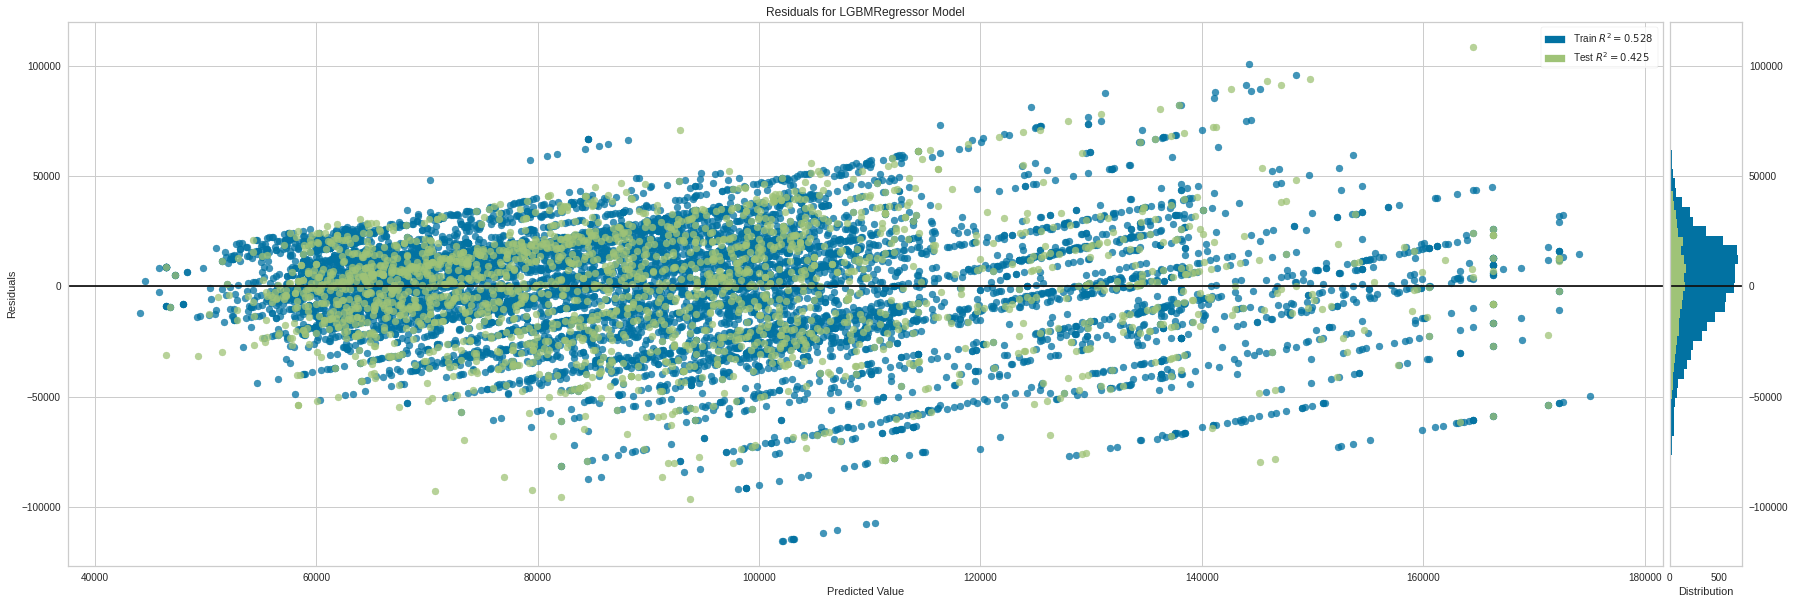

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(Light_Gradient_Boosting_Machine)

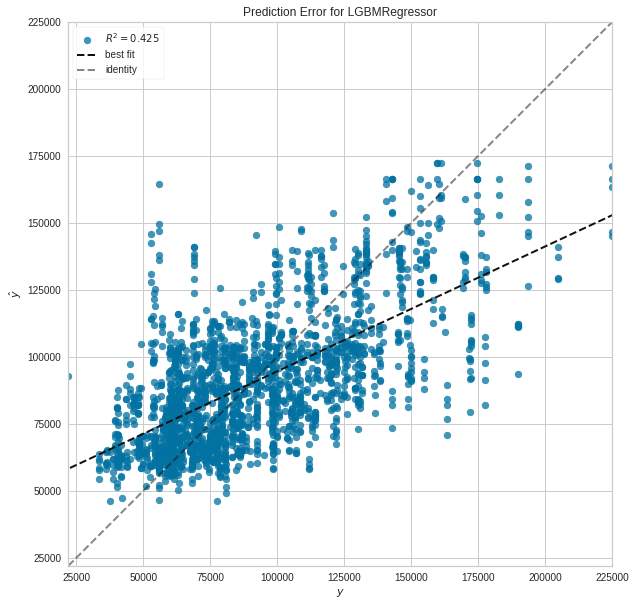

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(Light_Gradient_Boosting_Machine, plot = 'error')

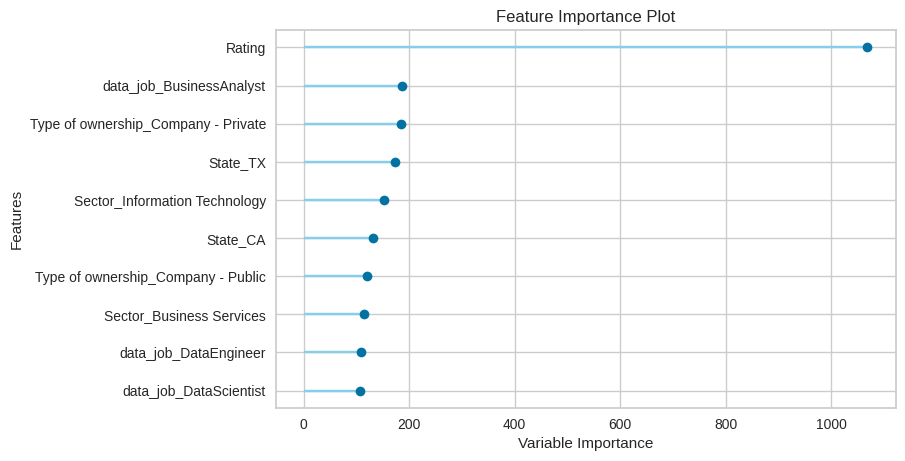

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
plot_model(Light_Gradient_Boosting_Machine, plot = 'feature')

**使用automl套件pycaret來進行建模，因為lightgbm的R^2最大而選擇此模型MAE約2K，預測還算是接近，但變數的選擇因為多為類別，唯一數值則是Rating，若後續要調整變數 會要從Job Description裡面解析文字弄出欄位，根據能力建立變數，提升薪水的預測，原本拿到資料想要做根據履歷預測人資是否錄取但沒看到這個欄位**

參考程式碼:
https://www.kaggle.com/code/matheusdalbuquerque/businessanalystjobs-dataset-simple-ead/data